# Assignment 1: Implement PCA using numpy

In [32]:
import numpy as np

In [33]:
class PCA:
    def __init__(self, d_principles):
      self.d_principles = d_principles
      self.mean = None
      self.components = None

    def fit(self, X):
      # mean
      self.mean = np.mean(X, axis=0)
      X = X - self.mean
      # covariance
      # row = 1 sample, columns = features
      cov = np.cov(X.T)
      # eigenvetors, eigenvalues
      eigenvalues, eigenvectors = np.linalg.eig(cov)
      # sort eigenvectors
      eigenvectors = eigenvectors.T
      idxs = np.argsort(eigenvalues)[::-1]
      eigenvalues = eigenvalues[idxs]
      eigenvectors = eigenvectors[idxs]
      # store first n eigenvectors
      self.components = eigenvectors[0:self.d_principles]

    def transform(self, X):
      # project data
      X = X - self.mean
      return np.dot(X, self.components.T)

# Assignment 2

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [35]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import random

## Reading the training images

In [36]:
!unzip /content/drive/MyDrive/yalefaces

Archive:  /content/drive/MyDrive/yalefaces.zip
replace yalefaces/person-4/rightlight? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: yalefaces/person-4/rightlight  
  inflating: yalefaces/person-4/leftlight  
  inflating: yalefaces/person-4/normal  
  inflating: yalefaces/person-4/noglasses  
  inflating: yalefaces/person-4/happy  
  inflating: yalefaces/person-4/centerlight  
  inflating: yalefaces/person-4/sleepy  
  inflating: yalefaces/person-4/glasses  
  inflating: yalefaces/person-4/wink  
  inflating: yalefaces/person-4/surprised  
  inflating: yalefaces/person-15/rightlight  
  inflating: yalefaces/person-15/leftlight  
  inflating: yalefaces/person-15/normal  
  inflating: yalefaces/person-15/noglasses  
  inflating: yalefaces/person-15/sad  
  inflating: yalefaces/person-15/centerlight  
  inflating: yalefaces/person-15/sleepy  
  inflating: yalefaces/person-15/glasses  
  inflating: yalefaces/person-15/wink  
  inflating: yalefaces/person-15/surprised  
  inflating: y

Chosen person: person-2
States: ['wink', 'rightlight', 'noglasses', 'sad', 'centerlight', 'normal', 'glasses', 'sleepy', 'surprised', 'happy']


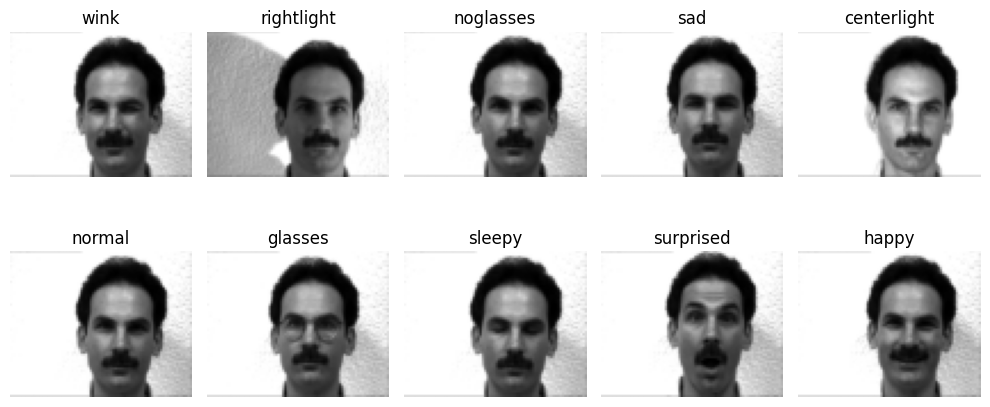

In [37]:
BASE_DIR = '/content/yalefaces'
person_folders = [f'person-{i}' for i in range(1, 16)]

person = random.choice(person_folders)
person_path = os.path.join(BASE_DIR, person)
states = os.listdir(person_path)

print(f"Chosen person: {person}")
print(f"States: {states}")

plt.figure(figsize=(10,5))
for i, filename in enumerate(states):
  image = imread(os.path.join(person_path, filename))
  image = image.squeeze()
  image = resize(image, (64, 80), anti_aliasing=True)
  plt.subplot(2, 5, i + 1)
  plt.imshow(image, cmap='gray')
  plt.axis('off')
  plt.title(filename)

plt.tight_layout()
plt.show()

In [38]:
data = {}
for person in person_folders:
  for filename in os.listdir(os.path.join(BASE_DIR, person)):
    image = imread(os.path.join(BASE_DIR, person, filename))
    image = resize(image, (1, 64, 80), anti_aliasing=True)
    if person not in data:
      data[person] = [image]
    else:
      data[person].append(image)

for person in data:
  data[person] = np.concat(data[person], axis=0).reshape(10, -1)

### Standadizing Images

In [39]:
def standardizing(images):
  images = (images - images.mean()) / images.std()
  images = images.astype(np.float32)
  return images

## Approximating the Principle Space having 20 dimensions

In [40]:
pca = PCA(d_principles=20)

images = []
for person in data:
  images.append(data[person])

images = np.concat(images, axis=0)
images = standardizing(images)
images.shape

(150, 5120)

In [41]:
pca.fit(images)

In [44]:
pca.components

array([[-0.00230358+0.j, -0.00165706+0.j, -0.00161249+0.j, ...,
         0.00970014+0.j,  0.0089938 +0.j,  0.00871797+0.j],
       [-0.00560545+0.j, -0.00483435+0.j, -0.00454695+0.j, ...,
        -0.01574871+0.j, -0.01486946+0.j, -0.01553509+0.j],
       [-0.00229295+0.j, -0.00304252+0.j, -0.00281368+0.j, ...,
        -0.00144019+0.j, -0.00185854+0.j, -0.00092226+0.j],
       ...,
       [ 0.00405623+0.j,  0.00413754+0.j,  0.00355692+0.j, ...,
        -0.0091511 +0.j, -0.00456575+0.j, -0.00258365+0.j],
       [-0.0035548 +0.j, -0.00308335+0.j, -0.00230981+0.j, ...,
         0.00581224+0.j,  0.0071265 +0.j,  0.00431259+0.j],
       [ 0.01039889+0.j,  0.00948087+0.j,  0.00819025+0.j, ...,
        -0.00901563+0.j, -0.00968182+0.j, -0.00611997+0.j]])

## Visualize the base of this Principle Space

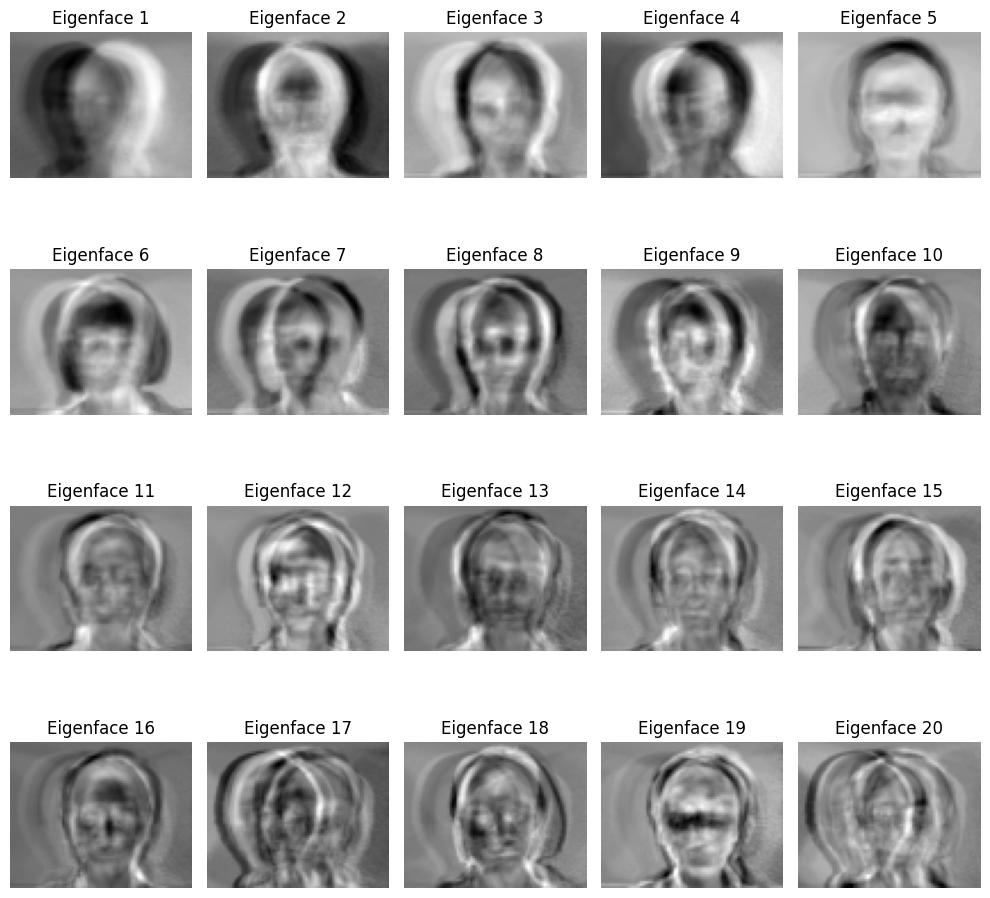

In [47]:
eigenfaces = pca.components.real
eigenfaces = eigenfaces.reshape(20, 64, 80)

plt.figure(figsize=(10,10))
for i, eigenface in enumerate(eigenfaces):
  plt.subplot(4, 5, i + 1)
  plt.imshow(eigenface, cmap='gray')
  plt.axis('off')
  plt.title(f'Eigenface {i + 1}')

plt.tight_layout()
plt.show()

# Assignment 3

### Finding the Mean Faces

In [49]:
mean_faces = {
    person: np.mean(images, axis=0)
    for person, images in data.items()
}

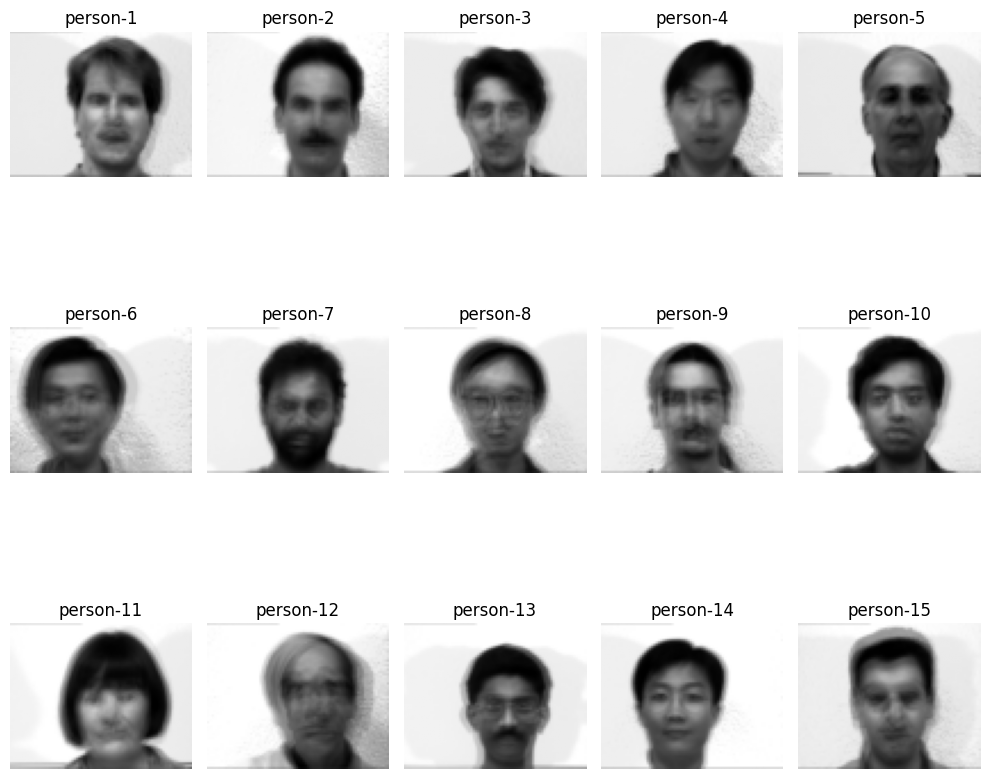

In [50]:
plt.figure(figsize=(10,10))
for i, person in enumerate(mean_faces):
  mean_face = mean_faces[person]
  mean_face = mean_face.reshape(64, 80)
  plt.subplot(3, 5, i + 1)
  plt.imshow(mean_face, cmap='gray')
  plt.axis('off')
  plt.title(person)

plt.tight_layout()
plt.show()

### Project the Mean Faces into the Principle Space

In [53]:
projected_mean_faces = {}
for person in mean_faces:
  mean_face = mean_faces[person]
  projected_mean_faces[person] = pca.transform(mean_face)

### Loading the Test Data

In [54]:
labels = []
test_images = []
TEST_DIR = '/content/yalefaces/test'
for filename in os.listdir(os.path.join(TEST_DIR)):
  person_name = filename.split('.')[0]
  labels.append(person_name)

  image = imread(os.path.join(TEST_DIR, filename))
  image = resize(image, (1, 64, 80), anti_aliasing=True)
  test_images.append(image)

In [55]:
test_images = np.concat(test_images, axis=0)
test_images.shape

(15, 64, 80)

In [56]:
labels

['person-8',
 'person-10',
 'person-14',
 'person-11',
 'person-6',
 'person-7',
 'person-4',
 'person-1',
 'person-15',
 'person-13',
 'person-9',
 'person-2',
 'person-5',
 'person-3',
 'person-12']

In [63]:
def Euclide_distance(x, y):
  assert x.shape == y.shape, f"{x.__str__()} and {y.__str__()} are miss-shaped"
  return np.sqrt(np.sum((x - y) ** 2))

In [64]:
predictions = {}
for label, image in zip(labels, test_images):
  image = image.reshape(-1)
  projected_face = pca.transform(image)
  closest_distance = np.inf
  closest_person = None

  for person in projected_mean_faces:
    mean_face = projected_mean_faces[person]
    distance = Euclide_distance(mean_face, projected_face)
    if distance < closest_distance:
      closest_distance = distance
      closest_person = person

  predictions[label] = closest_person

In [65]:
EMs = []
for label in predictions:
  EMs.append(predictions[label] == label)

In [66]:
print(f"Accuracy: {(np.mean(EMs) * 100):0.2f}%")

Accuracy: 66.67%
